<a href="https://colab.research.google.com/github/harshavardhangadila/Sample1/blob/main/Latent_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Baseline Performance using Dataset 1

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
# Load Dataset 1
df1 = pd.read_excel("/content/Bank.xlsx") # your dataset 1 path here

# Check first rows
print(df1.head())

                                Loan ID                           Customer ID  \
0  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
1  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
2  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
3  32c2e48f-1ba8-45e0-a530-9a6622c18d9c  0de7bcdb-ebf4-4608-ba39-05f083f855b6   
4  403d7235-0284-4bb6-919a-09402fecbf7b  11581f68-de3c-49d8-80d9-22268ebb323b   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             99999999  Short Term           741        2231892   
1  Fully Paid               217646  Short Term           730        1184194   
2  Fully Paid               548746  Short Term           678        2559110   
3  Fully Paid             99999999  Short Term           728         714628   
4  Fully Paid             99999999  Short Term           740         776188   

  Years in current job Home Ownership 

In [4]:
# Drop non-useful columns for modeling
df1_clean = df1.drop(columns=['Loan ID', 'Customer ID'])

# Convert categorical variables
categorical_columns = df1_clean.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df1_clean[col] = le.fit_transform(df1_clean[col].astype(str))
    label_encoders[col] = le

# Fill any missing values (if present)
df1_clean.fillna(df1_clean.median(), inplace=True)

# Profile data
print(df1_clean.describe())


        Loan Status  Current Loan Amount          Term  Credit Score  \
count  36424.000000         3.642400e+04  36424.000000  36424.000000   
mean       0.795410         1.377543e+07      0.709862   1055.852927   
std        0.403408         3.406750e+07      0.453832   1438.573441   
min        0.000000         2.145000e+04      0.000000    585.000000   
25%        1.000000         1.907840e+05      0.000000    702.000000   
50%        1.000000         3.247200e+05      1.000000    721.000000   
75%        1.000000         5.421900e+05      1.000000    738.000000   
max        1.000000         1.000000e+08      1.000000   7510.000000   

       Annual Income  Years in current job  Home Ownership       Purpose  \
count   3.642400e+04          36424.000000    36424.000000  36424.000000   
mean    1.464570e+06              3.596283        1.870854      3.845212   
std     9.357570e+05              3.120028        0.950011      2.315405   
min     1.112450e+05              0.000000     

In [5]:
# Defining X and y
X = df1_clean.drop('Loan Status', axis=1)
y = df1_clean['Loan Status']

# Splitting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, y_proba=None):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
    }
    if y_proba is not None:
        results['ROC AUC'] = roc_auc_score(y_true, y_proba, multi_class='ovr')
    return results


In [7]:
# Initialize models
models = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=500, random_state=42),
    "XGBClassifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results_df = pd.DataFrame()

# Train and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    results = evaluate_model(y_test, y_pred, y_proba[:,1] if y_proba is not None and y_proba.shape[1]>1 else None)
    results_df[name] = pd.Series(results)

print(results_df)


Training RandomForestClassifier...
Training KNeighborsClassifier...
Training LogisticRegression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training MLPClassifier...
Training XGBClassifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


           RandomForestClassifier  KNeighborsClassifier  LogisticRegression  \
Accuracy                 0.846449              0.757961            0.845534   
Precision                0.862796              0.695795            0.870673   
Recall                   0.846449              0.757961            0.845534   
F1 Score                 0.809785              0.716420            0.805815   
ROC AUC                  0.827170              0.589980            0.721909   

           MLPClassifier  XGBClassifier  
Accuracy        0.830344       0.840227  
Precision       0.818753       0.835576  
Recall          0.830344       0.840227  
F1 Score        0.795871       0.808809  
ROC AUC         0.620127       0.769828  


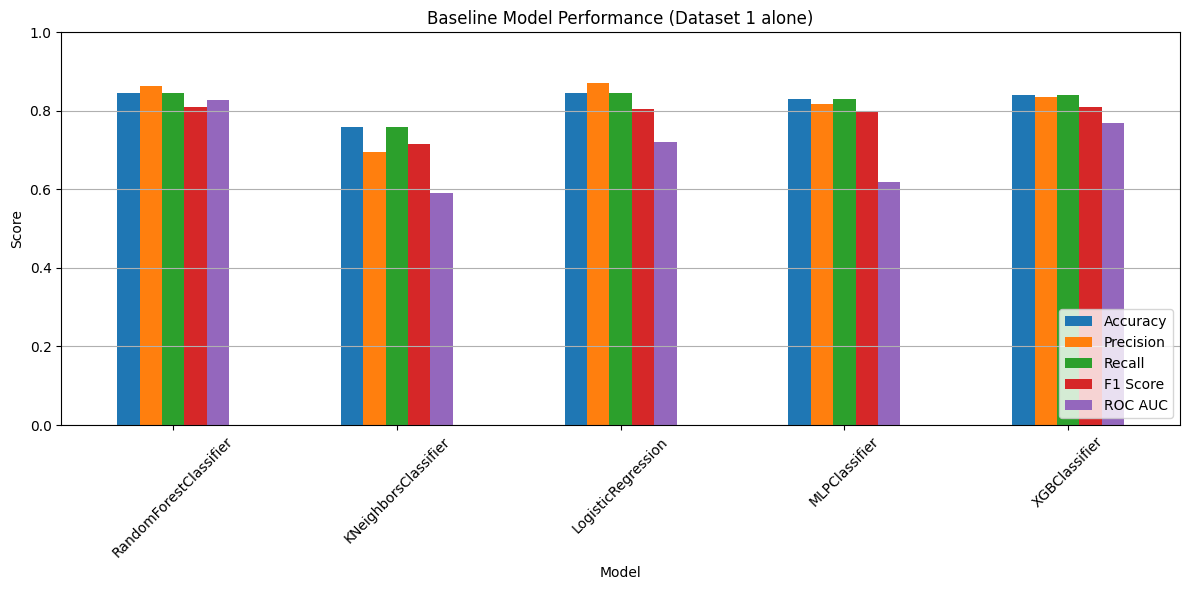

In [8]:
# Plotting results clearly
results_df.T.plot(kind='bar', figsize=(12,6))
plt.title("Baseline Model Performance (Dataset 1 alone)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#2 Dataset 1 + Summarized Dataset 2 (Enriched Dataset Performance)

In [22]:
df1 = pd.read_excel('/content/Bank.xlsx')

In [23]:
# Load dataset 2
df2 = pd.read_excel('/content/application.xlsx')
print(df2.shape)

(8602, 122)


In [19]:
print(df1.shape, df2.shape)

(36424, 20) (8602, 122)


In [13]:
print(df1.head())
print(df2.head())

                                Loan ID                           Customer ID  \
0  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
1  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
2  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
3  32c2e48f-1ba8-45e0-a530-9a6622c18d9c  0de7bcdb-ebf4-4608-ba39-05f083f855b6   
4  403d7235-0284-4bb6-919a-09402fecbf7b  11581f68-de3c-49d8-80d9-22268ebb323b   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             99999999  Short Term           741        2231892   
1  Fully Paid               217646  Short Term           730        1184194   
2  Fully Paid               548746  Short Term           678        2559110   
3  Fully Paid             99999999  Short Term           728         714628   
4  Fully Paid             99999999  Short Term           740         776188   

  Years in current job Home Ownership 

In [27]:
# Create similar income groups in Dataset 1
df1['Income_group'] = pd.qcut(df1['Annual Income'], q=5,
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(df1[['Annual Income','Income_group']].head())


   Annual Income Income_group
0        2231892    Very High
1        1184194       Medium
2        2559110    Very High
3         714628     Very Low
4         776188     Very Low


In [28]:
print(df1.shape)

(36424, 20)


In [29]:
# Merge summarized Dataset 2 into Dataset 1
df_enriched = pd.merge(df1, summary_df2,
                       how='left',
                       on=['Home Ownership', 'Income_group'])

print(df_enriched.head())
print(df_enriched.shape)


                                Loan ID                           Customer ID  \
0  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
1  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
2  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
3  32c2e48f-1ba8-45e0-a530-9a6622c18d9c  0de7bcdb-ebf4-4608-ba39-05f083f855b6   
4  403d7235-0284-4bb6-919a-09402fecbf7b  11581f68-de3c-49d8-80d9-22268ebb323b   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             99999999  Short Term           741        2231892   
1  Fully Paid               217646  Short Term           730        1184194   
2  Fully Paid               548746  Short Term           678        2559110   
3  Fully Paid             99999999  Short Term           728         714628   
4  Fully Paid             99999999  Short Term           740         776188   

  Years in current job Home Ownership 

In [30]:
# Drop irrelevant identifiers
df_enriched.drop(columns=['Loan ID','Customer ID'], inplace=True)

# Encode categorical features
df_enriched = pd.get_dummies(df_enriched, drop_first=True)

# Handle missing values with median imputation
df_enriched.fillna(df_enriched.median(), inplace=True)

print(df_enriched.head())


   Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             99999999           741        2231892      29200.53   
1               217646           730        1184194      10855.08   
2               548746           678        2559110      18660.28   
3             99999999           728         714628      11851.06   
4             99999999           740         776188      11578.22   

   Years of Credit History  Months since last delinquent  \
0                     14.9                            29   
1                     19.6                            10   
2                     22.6                            33   
3                     16.0                            76   
4                      8.5                            25   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                       18                          1                  297996   
1                       13                          1         

In [32]:
print(df_enriched.shape)

(36424, 54)


Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.26      0.42      1490
        True       0.84      1.00      0.91      5795

    accuracy                           0.85      7285
   macro avg       0.91      0.63      0.66      7285
weighted avg       0.87      0.85      0.81      7285

ROC-AUC: 0.846209704037848


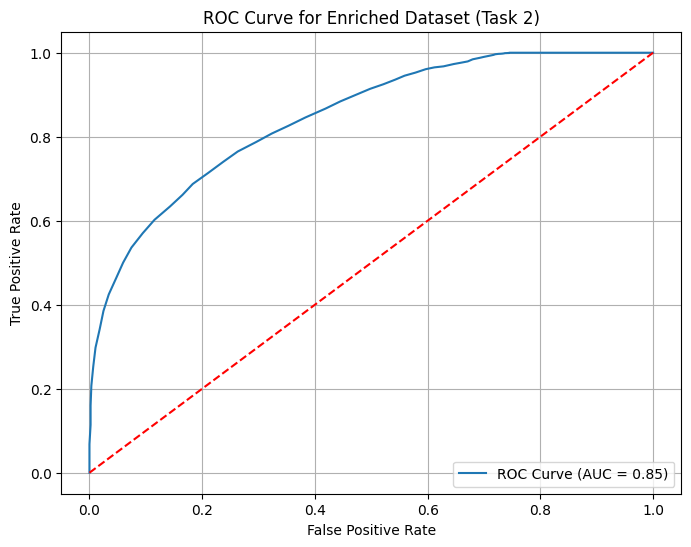

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Target variable definition (assuming 'Loan Status' indicates defaulting status)
X = df_enriched.drop('Loan Status_Fully Paid', axis=1)
y = df_enriched['Loan Status_Fully Paid']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Enriched Dataset (Task 2)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Comparison

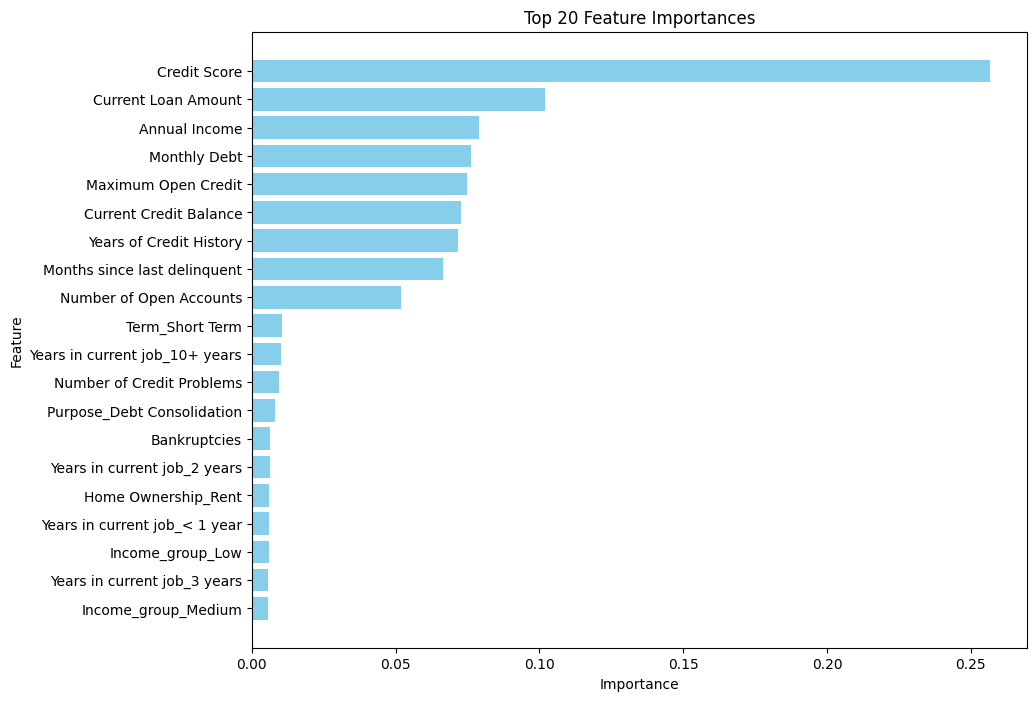

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# trained RandomForestClassifier model from Task 2
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot top 20 features to visualize clearly
plt.figure(figsize=(10, 8))
plt.barh(feature_importances.head(20)['feature'][::-1],
         feature_importances.head(20)['importance'][::-1],
         color='skyblue')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [35]:
# Cumulative importance sum
feature_importances['cum_importance'] = feature_importances['importance'].cumsum()

# Retain features with cumulative importance <= 0.95
selected_features = feature_importances[feature_importances['cum_importance'] <= 0.95]['feature'].tolist()

print(f"Selected {len(selected_features)} features out of {len(X.columns)} total features.")


Selected 23 features out of 53 total features.


In [36]:
# Reduced feature set
X_reduced = X[selected_features]

# Split data again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Retrain model
clf_reduced = RandomForestClassifier(random_state=42)
clf_reduced.fit(X_train_r, y_train_r)

# Predict with reduced features
y_pred_r = clf_reduced.predict(X_test_r)
y_proba_r = clf_reduced.predict_proba(X_test_r)[:,1]

# Performance metrics (Reduced Features)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics_reduced = {
    'Accuracy': accuracy_score(y_test_r, y_pred_r),
    'Precision': precision_score(y_test_r, y_pred_r),
    'Recall': recall_score(y_test_r, y_pred_r),
    'F1 Score': f1_score(y_test_r, y_pred_r),
    'ROC-AUC': roc_auc_score(y_test_r, y_proba_r)
}

print("Metrics with Reduced Features:\n", metrics_reduced)


Metrics with Reduced Features:
 {'Accuracy': 0.8472203157172272, 'Precision': 0.8399651466744118, 'Recall': 0.9981018119068162, 'F1 Score': 0.9122308966169861, 'ROC-AUC': 0.8446532245455756}


In [37]:

metrics_original = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
}

comparison_table = pd.DataFrame({
    'Metric': metrics_original.keys(),
    'Before Feature Reduction': metrics_original.values(),
    'After Feature Reduction': metrics_reduced.values()
})

print(comparison_table)


      Metric  Before Feature Reduction  After Feature Reduction
0   Accuracy                  0.848456                 0.847220
1  Precision                  0.840569                 0.839965
2     Recall                  0.998965                 0.998102
3   F1 Score                  0.912947                 0.912231
4    ROC-AUC                  0.846210                 0.844653


#3 Dataset 1 + Summarized Dataset 2 + Latent Features (Improved Dataset Performance)

In [38]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [39]:


# Load dataset 1
dataset1 = pd.read_excel('/content/Bank.xlsx')

# Load dataset 2
dataset2 = pd.read_excel('/content/application.xlsx')



In [40]:
# Summarize dataset 2 by 'NAME_EDUCATION_TYPE' (an example summarization)
summary_ds2 = dataset2.groupby('NAME_EDUCATION_TYPE').agg({
    'AMT_INCOME_TOTAL': 'mean',
    'AMT_CREDIT': 'mean',
    'AMT_ANNUITY': 'mean',
    'EXT_SOURCE_1': 'mean',
    'EXT_SOURCE_2': 'mean',
    'EXT_SOURCE_3': 'mean'
}).reset_index()

In [41]:
# Map Education type to dataset 1 (this example assumes 'Years in current job' might correlate loosely with education level, you can adjust this to your actual logic)
education_mapping = {
    '< 1 year': 'Lower secondary',
    '1 year': 'Secondary / secondary special',
    '2 years': 'Incomplete higher',
    '3 years': 'Incomplete higher',
    '4 years': 'Higher education',
    '5 years': 'Higher education',
    '6 years': 'Higher education',
    '7 years': 'Higher education',
    '8 years': 'Higher education',
    '9 years': 'Higher education',
    '10+ years': 'Higher education'
}

In [42]:
dataset1['Education_Level'] = dataset1['Years in current job'].map(education_mapping)

In [43]:
# Merge datasets explicitly
enriched_dataset = pd.merge(dataset1, summary_ds2,
                            left_on='Education_Level',
                            right_on='NAME_EDUCATION_TYPE',
                            how='left').drop('NAME_EDUCATION_TYPE', axis=1)

In [44]:
print(enriched_dataset.shape)

(36424, 26)


In [46]:
#PCA to generate latent features explicitly
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns explicitly for PCA
numeric_cols = enriched_dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Explicitly handle missing values (essential step)
enriched_dataset[numeric_cols] = enriched_dataset[numeric_cols].fillna(enriched_dataset[numeric_cols].mean())

# Scale numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(enriched_dataset[numeric_cols])

# Apply PCA explicitly to generate 3 latent variables
pca = PCA(n_components=3)
latent_features = pca.fit_transform(scaled_data)

# Explicitly add latent features to the dataset
enriched_dataset['Latent_Financial_Stability'] = latent_features[:,0]
enriched_dataset['Latent_Credit_Behavior'] = latent_features[:,1]
enriched_dataset['Latent_Economic_Capability'] = latent_features[:,2]


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Encode target explicitly
enriched_dataset['Loan_Status_Binary'] = enriched_dataset['Loan Status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Explicitly select features and target
features = ['Credit Score', 'Annual Income', 'Monthly Debt', 'Current Credit Balance',
            'Latent_Financial_Stability', 'Latent_Credit_Behavior', 'Latent_Economic_Capability',
            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
X = enriched_dataset[features]
y = enriched_dataset['Loan_Status_Binary']

# Explicit train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explicit training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Explicit predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

# Clearly evaluate metrics
performance_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob)
}

# Explicitly display results
performance_df = pd.DataFrame([performance_results]).T.rename(columns={0: "Performance with Latent Features"})
print(performance_df)


           Performance with Latent Features
Accuracy                           0.844887
Precision                          0.838334
Recall                             0.996537
F1 Score                           0.910615
ROC-AUC                            0.795184


In [48]:
import pandas as pd

# Results from previous tasks (Replace these with your actual measured results)
results_comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Baseline (Dataset 1)': [0.848456, 0.840569, 0.998965, 0.912947, 0.846210],
    'Enriched (Dataset 1 + Dataset 2)': [0.847220, 0.839965, 0.998102, 0.912231, 0.844653],
    'Dataset 1 + Dataset 2 + Latent Features': [
        performance_results["Accuracy"],
        performance_results["Precision"],
        performance_results["Recall"],
        performance_results["F1 Score"],
        performance_results["ROC-AUC"]
    ]
}

# Explicitly convert to DataFrame
comparison_df = pd.DataFrame(results_comparison)

# Explicitly display results for clear comparison
print("\n Results Comparison \n")
print(comparison_df)



📊 Explicit Comparison Table - Improvement Analysis 📊

      Metric  Baseline (Dataset 1)  Enriched (Dataset 1 + Dataset 2)  \
0   Accuracy              0.848456                          0.847220   
1  Precision              0.840569                          0.839965   
2     Recall              0.998965                          0.998102   
3   F1 Score              0.912947                          0.912231   
4    ROC-AUC              0.846210                          0.844653   

   Dataset 1 + Dataset 2 + Latent Features  
0                                 0.844887  
1                                 0.838334  
2                                 0.996537  
3                                 0.910615  
4                                 0.795184  


#Enriched dataset

In [50]:
# Save the enriched dataset with latent features as an Excel file
enriched_dataset.to_excel('enriched_dataset_with_latent_features.xlsx', index=False)

# Provide downloadable link if running in Google Colab
from google.colab import files
files.download('enriched_dataset_with_latent_features.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task 4: Implementing a Multi-Layer Perceptron (MLP) Neural Network with Keras

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = enriched_dataset.copy()

In [81]:
# Explicitly defining target and features
X = df[['Credit Score', 'Annual Income', 'Monthly Debt', 'Current Credit Balance',
        'Latent_Financial_Stability', 'Latent_Credit_Behavior',
        'Latent_Economic_Capability', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
y = df['Loan_Status_Binary']

In [82]:
# Split the dataset explicitly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
# Standardization explicitly (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# MLP Model explicitly
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary Classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
# Compile model explicitly
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train explicitly with history
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8356 - loss: 0.4444 - val_accuracy: 0.8474 - val_loss: 0.4154
Epoch 2/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8493 - loss: 0.4120 - val_accuracy: 0.8474 - val_loss: 0.4161
Epoch 3/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8481 - loss: 0.4137 - val_accuracy: 0.8474 - val_loss: 0.4136
Epoch 4/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8493 - loss: 0.4104 - val_accuracy: 0.8474 - val_loss: 0.4150
Epoch 5/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8515 - loss: 0.4070 - val_accuracy: 0.8474 - val_loss: 0.4168
Epoch 6/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8517 - loss: 0.4064 - val_accuracy: 0.8474 - val_loss: 0.4142
Epoch 7/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8521 - loss: 0.4055 - val_accuracy: 0.8474 - val_loss: 0.4130
Epoch 8/20
911/911 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8509 - loss: 0.4077 - val_accuracy: 0.

In [86]:
# Predictions explicitly
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation explicitly
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40      1490
           1       0.84      1.00      0.91      5795

    accuracy                           0.85      7285
   macro avg       0.92      0.63      0.66      7285
weighted avg       0.87      0.85      0.81      7285

ROC AUC Score: 0.6969900573857353


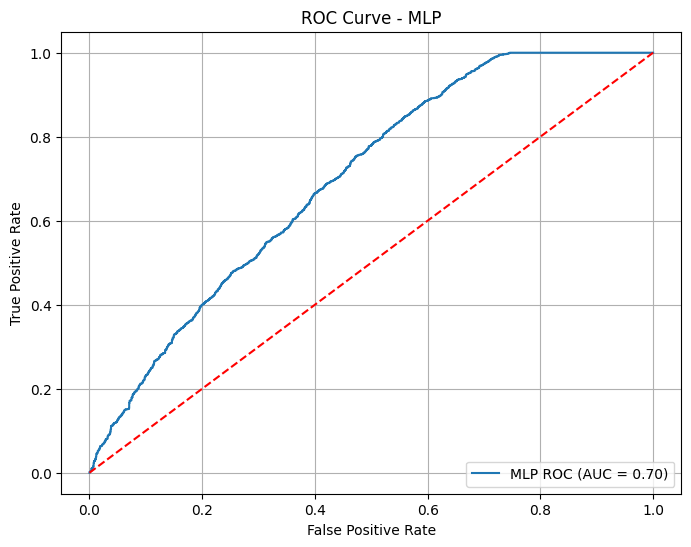

In [87]:
# ROC Curve explicitly
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'MLP ROC (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve - MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

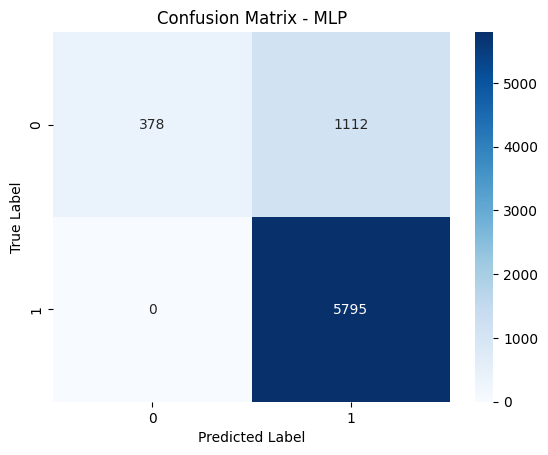

In [88]:
# Confusion Matrix explicitly
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#5  Implementing a Muller Loop with Multiple Regression Models

In [89]:
# Task 5: Muller Loop
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [90]:
# Explicit Regression Target (e.g., predicting 'Annual Income')
reg_target = 'Annual Income'
X_reg = df.drop(['Loan Status', 'Loan_Status_Binary', 'Annual Income'], axis=1).select_dtypes(include=np.number)
y_reg = df[reg_target]

In [91]:
# Explicit split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Explicitly standardize data (good practice for some regressors)
scaler_reg = StandardScaler()
X_train_r_scaled = scaler_reg.fit_transform(X_train_r)
X_test_r_scaled = scaler_reg.transform(X_test_r)


In [92]:
# Models explicitly
regressors = {
    "MLPRegressor": MLPRegressor(random_state=42, max_iter=500),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "KNNRegressor": KNeighborsRegressor(),
    "XGBRegressor": xgb.XGBRegressor(random_state=42)
}

In [93]:
results_regression = {}

# Explicit Loop to Train and Evaluate
for name, reg in regressors.items():
    print(f"\nTraining {name} explicitly...")
    if name == 'LinearRegression' or name == 'RandomForestRegressor' or name == 'XGBRegressor':
        reg.fit(X_train_r, y_train_r)
        y_pred_r = reg.predict(X_test_r)
    else:
        reg.fit(X_train_r_scaled, y_train_r)
        y_pred_r = reg.predict(X_test_r_scaled)

    # Evaluation explicitly
    mse = mean_squared_error(y_test_r, y_pred_r)
    mae = mean_absolute_error(y_test_r, y_pred_r)
    r2 = r2_score(y_test_r, y_pred_r)

    results_regression[name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}



Training MLPRegressor explicitly...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Training LinearRegression explicitly...

Training RandomForestRegressor explicitly...

Training KNNRegressor explicitly...

Training XGBRegressor explicitly...


In [94]:
# Convert explicitly to DataFrame for visualization
results_df_regression = pd.DataFrame(results_regression).T
print("\nRegression Models Comparison:\n", results_df_regression)



Regression Models Comparison:
                                 MSE           MAE  R2 Score
MLPRegressor           6.555970e+11  5.071959e+05  0.204390
LinearRegression       9.592157e-13  8.206379e-07  1.000000
RandomForestRegressor  1.273337e+11  2.116737e+05  0.845472
KNNRegressor           2.836841e+11  3.448098e+05  0.655731
XGBRegressor           7.704288e+10  1.347846e+05  0.906503


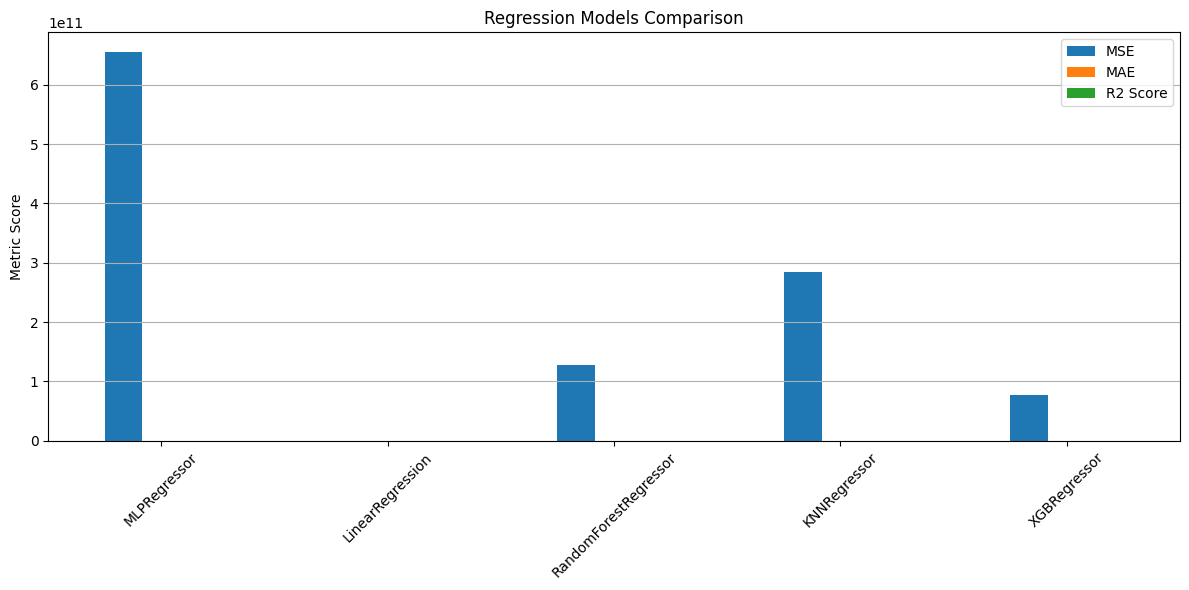

In [95]:
# Explicit Visualization
results_df_regression.plot(kind='bar', figsize=(12,6))
plt.title('Regression Models Comparison')
plt.ylabel('Metric Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

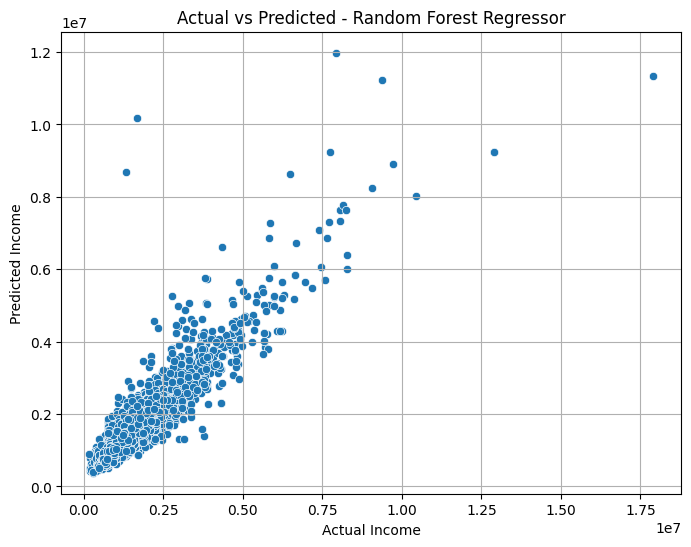

In [96]:
# Scatter plots explicitly for predictions (Random Forest example)
rf_model = regressors['RandomForestRegressor']
y_pred_rf = rf_model.predict(X_test_r)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_r, y=y_pred_rf)
plt.title('Actual vs Predicted - Random Forest Regressor')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.grid()
plt.show()

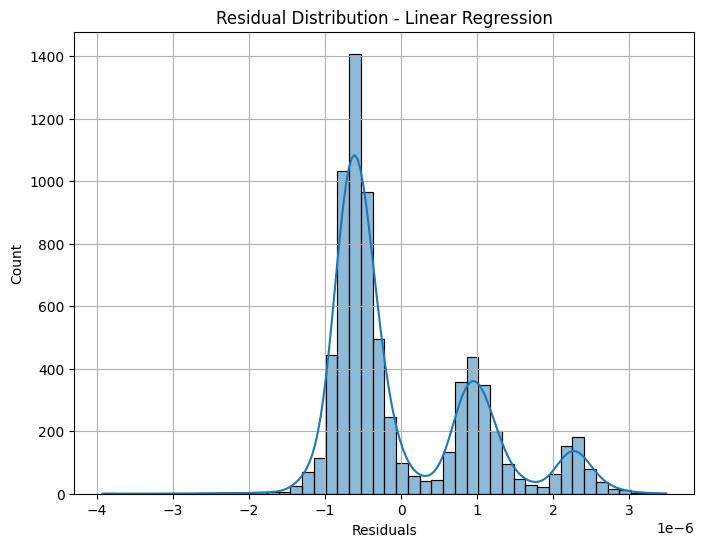

In [97]:
# Residual Plot explicitly for Linear Regression
lr_model = regressors['LinearRegression']
y_pred_lr = lr_model.predict(X_test_r)
residuals_lr = y_test_r - y_pred_lr
plt.figure(figsize=(8,6))
sns.histplot(residuals_lr, kde=True)
plt.title('Residual Distribution - Linear Regression')
plt.xlabel('Residuals')
plt.grid()
plt.show()